IMPORTS

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.graph_objects as go 
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
data = pd.read_csv("C:\\Users\\Parthiv\\Desktop\\Farming\\Notebook\\data\\Crop_Recommendation.csv")

In [4]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [5]:
data.columns

Index(['Nitrogen ', 'Phosphorus ', 'Potassium ', 'Temperature  ',
       'Humidity    ', 'pH_Value    ', 'Rainfall     ', 'Crop'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nitrogen       2200 non-null   int64  
 1   Phosphorus     2200 non-null   int64  
 2   Potassium      2200 non-null   int64  
 3   Temperature    2200 non-null   float64
 4   Humidity       2200 non-null   float64
 5   pH_Value       2200 non-null   float64
 6   Rainfall       2200 non-null   float64
 7   Crop           2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
data['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [9]:
data.isna().sum()

Nitrogen         0
Phosphorus       0
Potassium        0
Temperature      0
Humidity         0
pH_Value         0
Rainfall         0
Crop             0
dtype: int64

CHECKING VALIDATION COLUMN[crop] IF THERE IS IMBALANCE

In [10]:
Crop_balance = data['Crop'].value_counts()

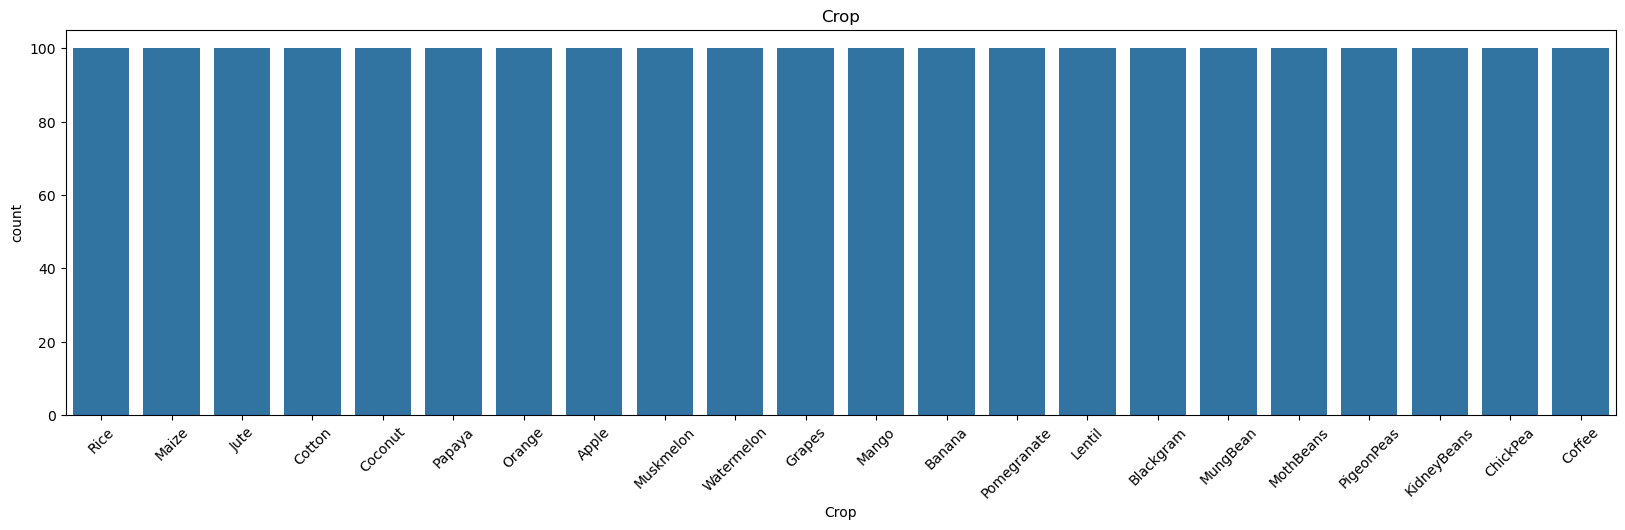

In [14]:
plt.figure(figsize=(20,5))
sns.barplot(data=Crop_balance)
plt.xticks(rotation=45)
plt.title("Crop")
plt.show()


ANALYZING NITROGEN AMOUNT IN RICE

In [25]:
data['Crop'].value_counts().index("1")

TypeError: 'Index' object is not callable

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data.index,
    y=data["Nitrogen "],
    name = 'Nitrogen',
    marker_color = 'indianred'
))

fig.add_trace(go.Bar(
    x=data.index,
    y=data['Phosphorus '],
    name = 'Phosphorus',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=data.index,
    y=data['Potassium '],
    name='Potash',
    marker_color='crimson'
))
fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)
fig.show()

In [38]:
corr = data.drop(columns=['Crop']).corr()

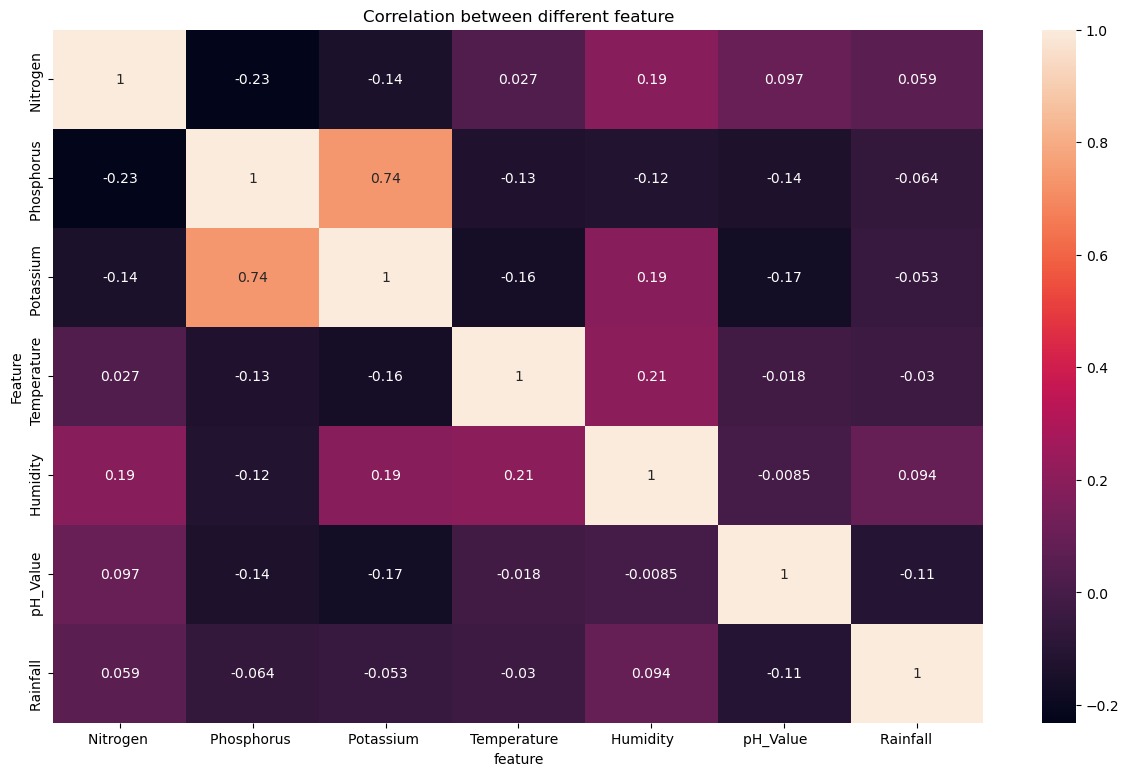

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(15,9))
sns.heatmap(corr, annot=True)
ax.set(xlabel = "feature")
ax.set(ylabel = 'Feature')
plt.title("Correlation between different feature")
plt.show()